# Task 2

1. Select the dataset and the ML problem (it is possible to select your old tasks from ML course or other courses implying ML/DL models).
2. Train the model.
3. Analyze the feature importance in your data for making predictions by your model using eli5/SHAP/LIME frameworks:
https://eli5.readthedocs.io/en/latest/overview.html#installation
https://github.com/slundberg/shap
https://github.com/marcotcr/lime 
Calculate permutation importance, SHAP values (for a specific prediction, for data sampling), analyze predictions with LIME; plot PDPs and other visualizations you like.
4. Analyze all the graphs/tables and write conclusions about your data, model and features.
5. Complete a task in a single Jupyter Notebook.

### The dataset was taken from Kaggle at the following link - <a href="https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data?select=heart_statlog_cleveland_hungary_final.csv"> Heart Disease Dataset</a>

### This heart disease dataset was created by combining 5 popular heart disease datasets that are already available independently of each other, but have not been combined before. In this dataset, 5 sets of heart disease data are combined across 11 common features, making it the largest set of heart disease data available to date for research purposes. The following five datasets were used to create it:
* ### Cleveland
* ### Hungarian
* ### Switzerland
* ### Long Beach, Virginia

***
### The Statlog (Heart) dataset.
### This dataset consists of 1190 instances with 11 functions. These datasets have been collected and combined in one place to help with research into machine learning and data mining algorithms related to CAD, and hopefully ultimately improve clinical diagnosis and early treatment.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


We have a dataset of 1190 observations, none of the attributes have Null values, which is good.

At the very beginning, the picture shows a description of the attributes, what they should be, pandas assigned the int64 format to almost all oin features. We need to reassign the data format to the attributes *'chest pain type'*, *'resting ecg'* and *'ST slope'* categorical data type

In [5]:
data['chest pain type'] = data['chest pain type'].astype('category')
data['resting ecg'] = data['resting ecg'].astype('category')
data['ST slope'] = data['ST slope'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   int64   
 1   sex                  1190 non-null   int64   
 2   chest pain type      1190 non-null   category
 3   resting bp s         1190 non-null   int64   
 4   cholesterol          1190 non-null   int64   
 5   fasting blood sugar  1190 non-null   int64   
 6   resting ecg          1190 non-null   category
 7   max heart rate       1190 non-null   int64   
 8   exercise angina      1190 non-null   int64   
 9   oldpeak              1190 non-null   float64 
 10  ST slope             1190 non-null   category
 11  target               1190 non-null   int64   
dtypes: category(3), float64(1), int64(8)
memory usage: 87.8 KB


Everyting is fine. Let's check for duplicates

In [7]:
data.duplicated().sum()

272

The dataset has 272 identical records, in the future, when training the model, this will undoubtedly affect the learning result, so it is necessary to get rid of these records

In [8]:
data = data.drop_duplicates(ignore_index=True)

Check for class imbalance

In [9]:
round(data.target.value_counts(normalize = True), 3)

target
1    0.553
0    0.447
Name: proportion, dtype: float64

Two classes quite balanced

# Build model
#### It is important for us to achieve such a result when we clearly predict the presence of the disease, since if a person actually has a heart disease, and the model predicts its absence, then this is a bad result.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, make_scorer, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, stratify=y)

Let's use the Grid Search method to select the optimal parameters

In [12]:
rf = RandomForestClassifier(random_state=23)

params = {'n_estimators': [100, 150, 200],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5],
          'max_features': ['sqrt', 'log2', None]}

rf_gscv = GridSearchCV(rf, param_grid=params, scoring=make_scorer(recall_score), cv=5)

rf_gscv.fit(X_train, y_train)

/Users/roman14/anaconda3/envs/Uni/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150, 200]},
             scoring=make_scorer(recall_score, response_method='predict'))

In [13]:
print(round(rf_gscv.best_score_, 3))
print(rf_gscv.best_params_)

0.921
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}


In [14]:
rf_gscv_pred = rf_gscv.best_estimator_.predict(X_test)
print(classification_report(y_test, rf_gscv_pred, digits=3))

              precision    recall  f1-score   support

           0      0.887     0.835     0.860       103
           1      0.872     0.913     0.892       127

    accuracy                          0.878       230
   macro avg      0.879     0.874     0.876       230
weighted avg      0.879     0.878     0.878       230



We got pretty good result. However this model doesn't have perfect predict, recall metric near 84% and 91%

# Analyzing model features

In [66]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

### Firtsly lets plot feature and permutation importance figure to compare them

In [54]:
rf_importance = pd.DataFrame(
    {'rf_imp':rf_gscv.best_estimator_.feature_importances_,
     'rf_perm_imp': permutation_importance(rf_gscv.best_estimator_, X_test, y_test, n_repeats=10, random_state=23, n_jobs=2).importances_mean
     },
       X.columns).sort_values(by='rf_imp')
rf_importance

,rf_imp,rf_perm_imp
fasting blood sugar,0.026241,0.011304
resting ecg,0.026718,0.005652
sex,0.041117,0.020870
resting bp s,0.073837,0.015217
age,0.079385,0.007391
exercise angina,0.082383,0.023478
cholesterol,0.103568,0.035652
oldpeak,0.105922,0.036522
max heart rate,0.109444,0.013043
chest pain type,0.127318,0.032609


Text(0.5, 1.0, 'Classic Feature Importance')

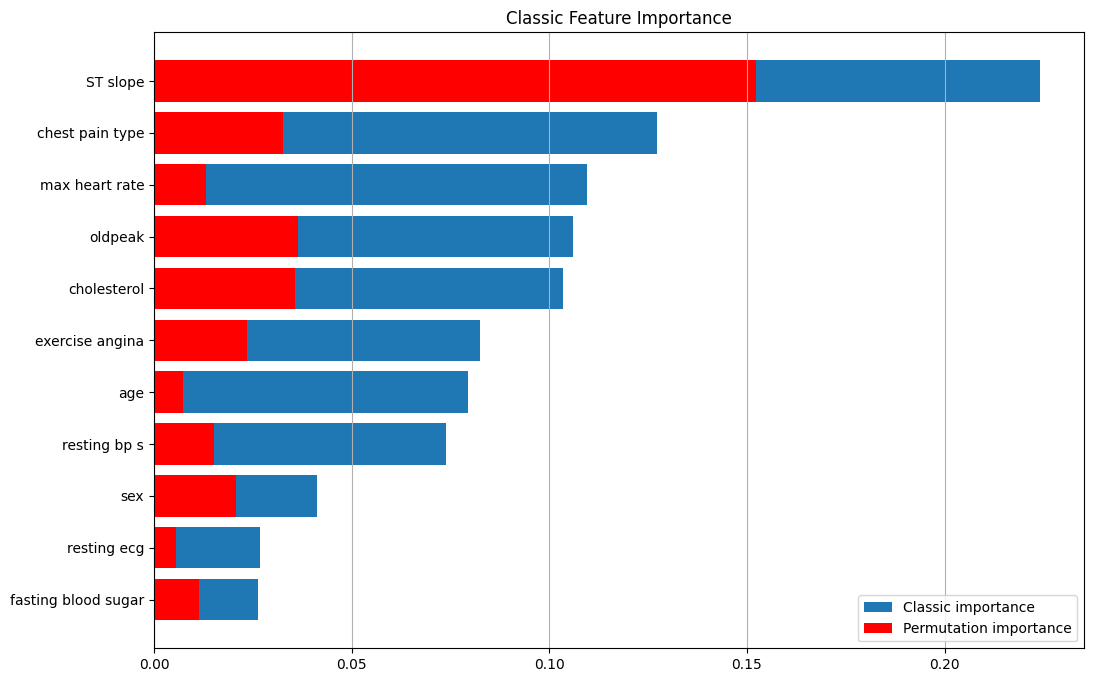

In [57]:
plt.figure(figsize=(12,8))
plt.barh(rf_importance.index, rf_importance['rf_imp'], label='Classic importance')
plt.barh(rf_importance.index, rf_importance['rf_perm_imp'], color = 'r', label='Permutation importance')
plt.grid(axis='x')
plt.legend()

plt.title('Classic Feature Importance')

As we can see feature 'ST slope' is the most important im both way of importance. However top 5 features of classic importance is - ST slope, chest pain, max heart rate, oldpealk and cholesterol while using permutation importance top 5 is different - ST slope, oldpeak, cholesterol, chest pain and exercise angina. Mostly both top 5 are the same, but inside each one the orders are different. 

### Visualize PDP (Partial Dependence Plot) and ICE (Individual Conditional Expectation)

Computing partial dependence plots...


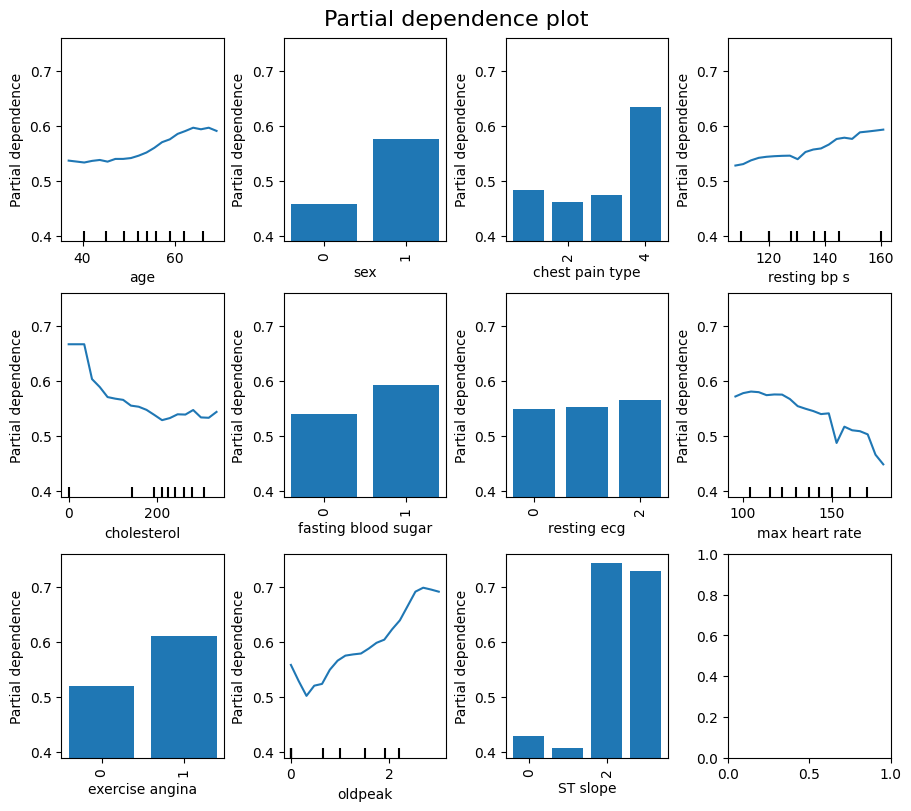

In [94]:
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": X.columns,
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": ['sex', 'chest pain type', 'resting ecg', 'ST slope', 'fasting blood sugar', 'exercise angina']
}

_, ax = plt.subplots(ncols=4, nrows=3, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    rf_gscv.best_estimator_,
    X_train,
    **features_info,
    ax=ax.flatten()[:11],
    **common_params,
)

_ = display.figure_.suptitle(
    (
        'Partial dependence plot'
    ),
    fontsize=16,
)

Firstly analyse numerical features.
By features "age", "resting bp s" and "oldpeak" probability to have heart disease grows almost linearly. 
Other trend for features "cholesterol" and "max heart rate", is seem to be that with big heart rate the blood goes fast what leads to deacresing heart disease.

What about categorical features, mens have more probability to get heart disease, also persons which have "exercise angina" and "fasting blood sugar" belongs to the group with higher proba disease. In the features "ST slope" two categories (2 and 3) visibly rise proba of heart disease the same for category 4 in "chest pain type" feature. It is agreed with the above feature importance plot, where "ST slope" and "chest pain type" take first places.

PDP is an average of the marginal effects of the features. We are averaging the response of all samples of the provided set. Thus, some effects could be hidden. In this regard, it is possible to plot each individual response. This representation is called the Individual Effect Plot (ICE). In the plot below, we plot full dataset selected ICEs for the "age" and "cholesterol".


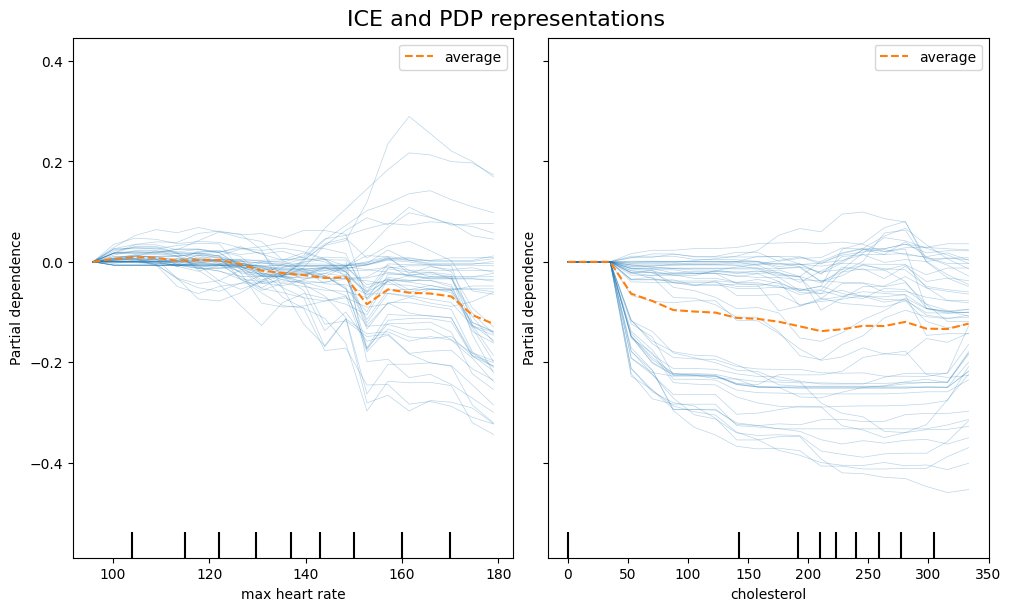

In [105]:
_, ax = plt.subplots(ncols=2, figsize=(10, 6), sharey=True, constrained_layout=True)

features_info = {
    "features": ["max heart rate", "cholesterol"],
    "kind": "both",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    rf_gscv.best_estimator_,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)

For the **max heart rate** feature on the left, the ICE lines indicate a consistent negative dependence on the prediction as heart rate exceeds 160 bpm, though some lines remain relatively flat below this threshold. This suggests that while higher heart rates tend to reduce the model's predicted values, not all data points are equally sensitive to changes in heart rate. 

For the **cholesterol** feature on the right, most ICE lines show a gradual decline in dependence, with a sharper drop for some lines at cholesterol levels above 250. This indicates that higher cholesterol generally leads to lower predictions, with certain instances being more affected than others at high cholesterol levels. But genereally leads to lower porbability of heart disease.

## SHAP values

In [142]:
import shap
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(rf_gscv.best_estimator_.predict, X_train)
shap_values = explainer(X_test)

Using 688 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 230/230 [26:50<00:00,  7.00s/it]


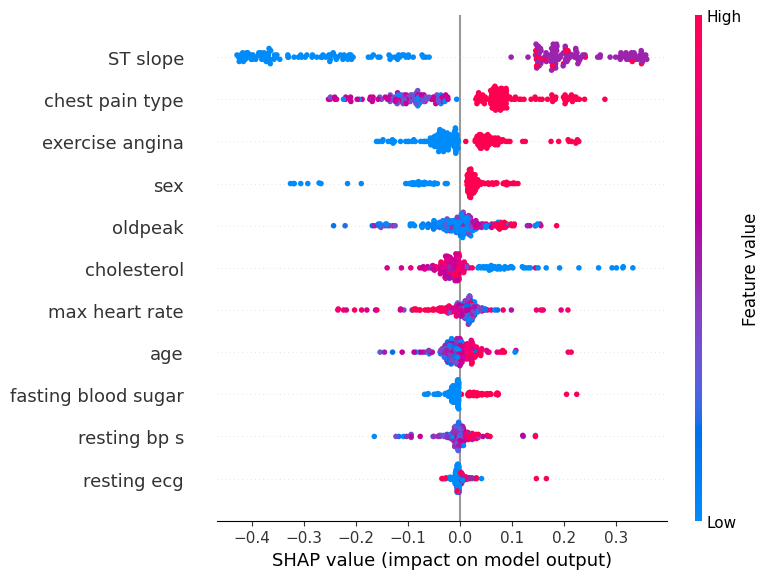

In [154]:
shap.summary_plot(shap_values)

Based on the above summary plot we can see that feature "resting ecg" have no big influence on the model, only two outliers make little impact. For features "ST slope", "chest pain type" and "exercise angina" SHAP values show the same picture: lower ST slope make low impact on model output like other two features, while bigger values increase influence. Also we can see that for feature sex high values (1 = man) impact isn't significant.

For feature cholesterol we can conclude that mostly high value almost don't have influence, but lower values lead to quite bigger impact.

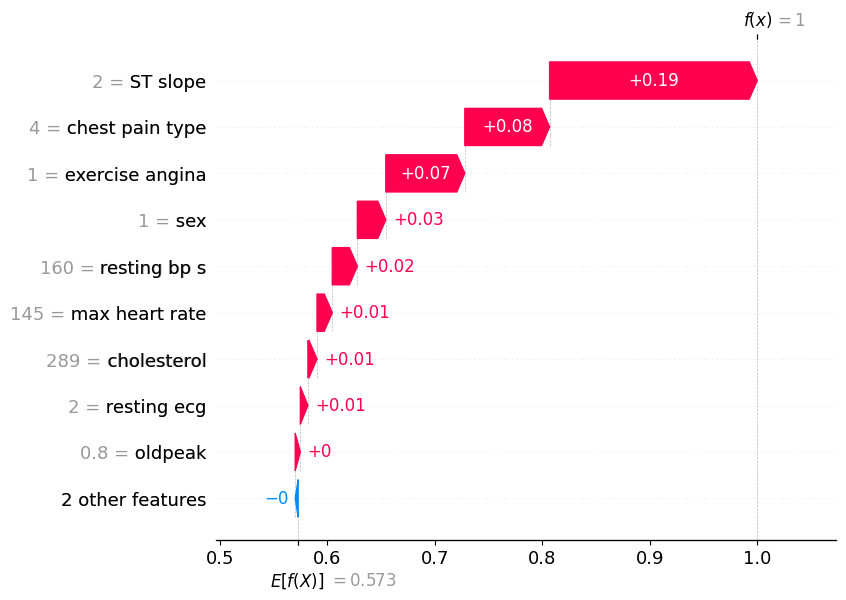

In [151]:
shap.plots.waterfall(shap_values[12])

Here on the above plot we see how certain feature values make impact on the model. Particularly for 12 observation ST slope with value 2 has th bigest influence (in PDP analyse we have already said about that), the same thing with chest pain type and exercise angina. For this observation almost all features has "positive" impact

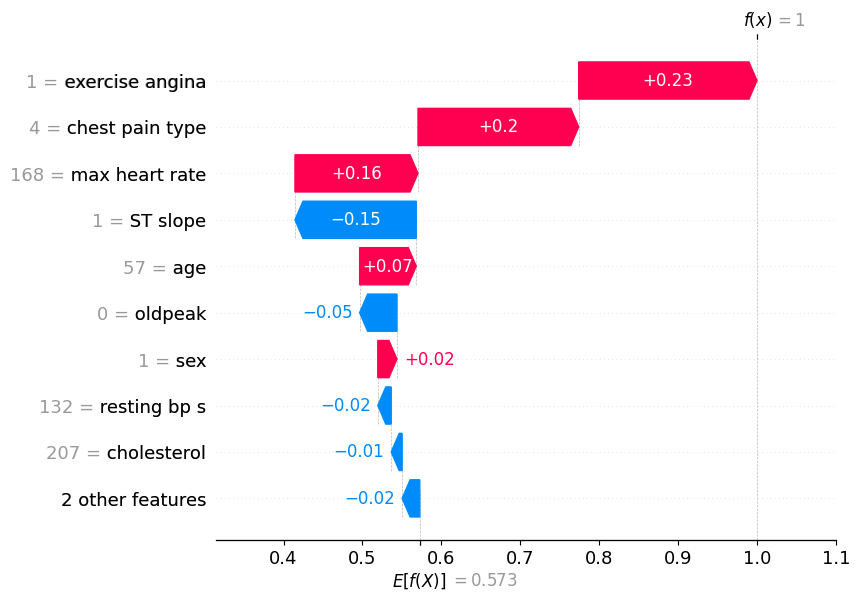

In [168]:
shap.plots.waterfall(shap_values[13])

Here for obs 13 ST slope with value 1 make negative impact and cover positive influence of max hear rate feature. However it's not enough to reduce probability of heart disease due to features "execrise angina" and "chest pain type"

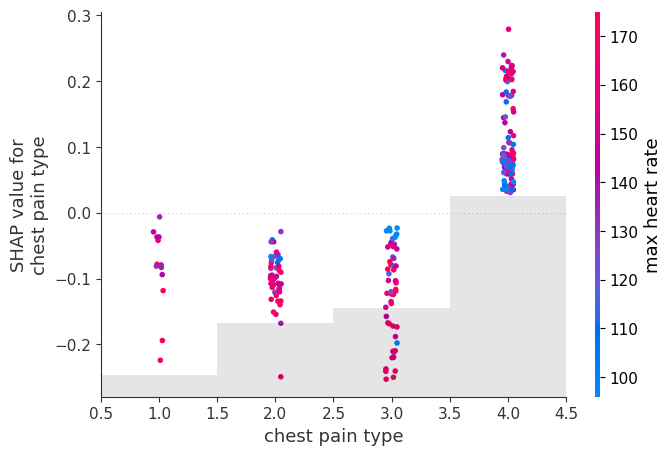

In [153]:
shap.plots.scatter(shap_values[:, "chest pain type"], color=shap_values)

On this plot we see the dependencies between values of "chest pain type" and "max heart rate". So people with chest pain type value until 4 have quite big heart rate. There is no such significant impact or dependecnie between pain 4 and heart rate, no uniformity.